In [89]:
import matplotlib.pyplot as plt
import numpy as np

In [90]:
import herringbone as hb

In [91]:

# map Names
map_names = ["slides", "example", "easy", "danger_holes", "double_fish", "wall_of_death", "example2", "mega"]


# 1. Cumulative Reward

In [ ]:
# Build MDP
selected_map_id = 0
state_path = "herringbone/env_core/config/state_config.json"
map_path = f"herringbone/env_core/maps/{map_names[selected_map_id]}.csv"
action_path = "herringbone/env_core/config/action_config.json"

GAMMA = 1

demo_mdp = hb.MDP(state_path, map_path, action_path, seed=42, gamma=GAMMA)

In [93]:
random_policy = hb.Policy(mdp=demo_mdp)
episode = hb.Episode(mdp=demo_mdp, policy=random_policy, max_depth=1000)
episode.peek()


╔═══════╦═══════╦═══════╦═══════╗
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╚═══════╩═══════╩═══════╩═══════╝[0]


In [94]:
step_size = 1
steps = 100
cumulative_rewards = []
mc_control = hb.MonteCarloController(demo_mdp, epsilon=0.01)
for i in range(steps):
    mc_control.train(n_episodes=step_size)
    episode = hb.Episode(mdp=demo_mdp, policy=mc_control.policy)
    episode.run()
    cumulative_rewards.append(sum(episode.trajectory.rewards[1:]))
    
print(len(cumulative_rewards))

100


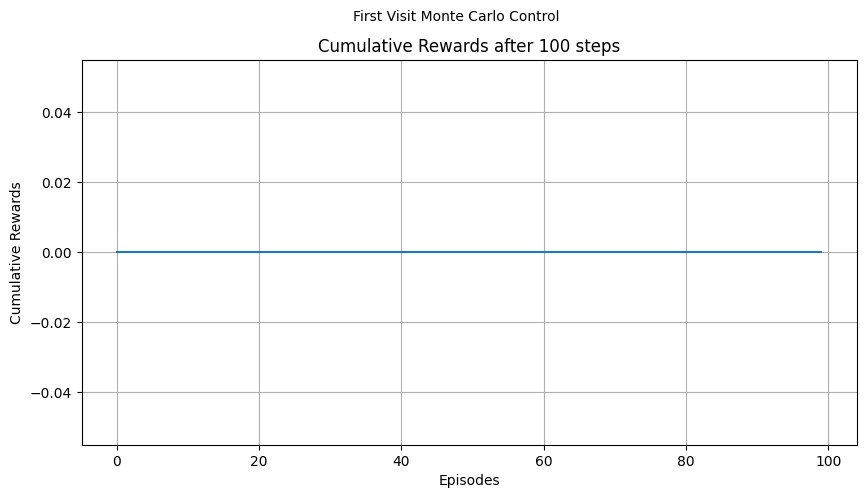

In [95]:
def plot_cumulative_rewards(cumulative_rewards, total_steps):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(cumulative_rewards)), cumulative_rewards, linestyle='-')

    plt.title(f'Cumulative Rewards after {total_steps} steps')
    plt.suptitle('First Visit Monte Carlo Control', fontsize=10)
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Rewards')
    plt.grid(True)
    plt.show()

# Example usage
total_steps = len(cumulative_rewards)
plot_cumulative_rewards(cumulative_rewards, total_steps)